In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import cartopy.crs as ccrs

### Reading in the data

### Airlines

As of January 2012, the OpenFlights Airlines Database contains 5888 airlines. Each entry contains the following information:

**Airline ID**	Unique OpenFlights identifier for this airline.

**Name**	Name of the airline.

**Alias**	Alias of the airline. For example, All Nippon Airways is commonly known as "ANA".

**IATA**	2-letter IATA code, if available.

**ICAO**	3-letter ICAO code, if available.

**Callsign**	Airline callsign.

**Country**	Country or territory where airport is located. See Countries to cross-reference to ISO 3166-1 codes.

**Active**	"Y" if the airline is or has until recently been operational, "N" if it is defunct. This field is not reliable: in particular, major airlines that stopped flying long ago, but have not had their IATA code reassigned (eg. Ansett/AN), will incorrectly show as "Y".
The data is UTF-8 encoded. The special value \N is used for "NULL" to indicate that no value is available, and is understood automatically by MySQL if imported.

Notes: Airlines with null codes/callsigns/countries generally represent user-added airlines. Since the data is intended primarily for current flights, defunct IATA codes are generally not included. For example, "Sabena" is not listed with a SN IATA code, since "SN" is presently used by its successor Brussels Airlines.

In [3]:
input_data = "DATA/airlines.txt"

headers = ['ID', 'Name', 'Alias', 'IATA', 'ICAO', 'Callsign', 'Country', 'Active']

airlines = pd.read_csv(input_data, sep=',', names=headers)
airlines = airlines.iloc[1:,]

In [4]:
airlines.shape

(6161, 8)

In [5]:
airlines.head()

ID                                          Name Alias IATA ICAO Callsign  \
1   1                                Private flight    \N    -  NaN      NaN   
2   2                                   135 Airways    \N  NaN  GNL  GENERAL   
3   3                                 1Time Airline    \N   1T  RNX  NEXTIME   
4   4  2 Sqn No 1 Elementary Flying Training School    \N  NaN  WYT      NaN   
5   5                               213 Flight Unit    \N  NaN  TFU      NaN   

          Country Active  
1             NaN      Y  
2   United States      N  
3    South Africa      Y  
4  United Kingdom      N  
5          Russia      N

### Airports

**Airport ID**	Unique OpenFlights identifier for this airport. 

**Name** Name of airport. May or may not contain the City name.

**City**	Main city served by airport. May be spelled differently from Name.

**Country**	Country or territory where airport is located. See Countries to cross-reference to ISO 3166-1 codes.

**IATA**	3-letter IATA code. Null if not assigned/unknown.

**ICAO**	4-letter ICAO code. Null if not assigned.

**Latitude**	Decimal degrees, usually to six significant digits. Negative is South, positive is North.

**Longitude**	Decimal degrees, usually to six significant digits. Negative is West, positive is East.

**Altitude**	In feet.

**Timezone**	Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.

**DST**	Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). 

**Tz database timezone**	Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".

**Type**	Type of the airport. Value "airport" for air terminals, "station" for train stations, "port" for ferry terminals and "unknown" if not known. In airports.csv, only type=airport is included.

**Source**	Source of this data. "OurAirports" for data sourced from OurAirports, "Legacy" for old data not matched to OurAirports (mostly DAFIF), "User" for unverified user contributions. In airports.csv, only source=OurAirports is included.
The data is UTF-8 encoded.

Note: Rules for daylight savings time change from year to year and from country to country. The current data is an approximation for 2009, built on a country level. Most airports in DST-less regions in countries that generally observe DST (eg. AL, HI in the USA, NT, QL in Australia, parts of Canada) are marked incorrectly.

In [6]:
input_data = "DATA/airports.txt"

headers = ['ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz database timezone', 'Type', 'Source']

airports = pd.read_csv(input_data, sep=',', names=headers)

In [7]:
#Remove nodes with missing coordinate values

airports = airports[airports.notnull()]

In [8]:
airports.shape

(7698, 14)

In [9]:
airports.head()

ID                                         Name          City  \
0   1                               Goroka Airport        Goroka   
1   2                               Madang Airport        Madang   
2   3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3   4                               Nadzab Airport        Nadzab   
4   5  Port Moresby Jacksons International Airport  Port Moresby   

            Country IATA  ICAO  Latitude           Longitude  Altitude  \
0  Papua New Guinea  GKA  AYGA -6.081690       145.391998291      5282   
1  Papua New Guinea  MAG  AYMD -5.207080       145.789001465        20   
2  Papua New Guinea  HGU  AYMH -5.826790  144.29600524902344      5388   
3  Papua New Guinea  LAE  AYNZ -6.569803          146.725977       239   
4  Papua New Guinea  POM  AYPY -9.443380  147.22000122070312       146   

  Timezone DST  Tz database timezone     Type       Source  
0       10   U  Pacific/Port_Moresby  airport  OurAirports  
1       10   U  Pacific/Port_Moresby  airport  OurAirports  
2       10   U  Pacific/Port_Moresby  airport  OurAirports  
3       10   U  Pacific/Port_Moresby  airport  OurAirports  
4       10   U  Pacific/Port_Moresby  airport  OurAirports

In [10]:
airports['Longitude'].isna().sum()

0

### Routes

As of June 2014, the OpenFlights/Airline Route Mapper Route Database contains 67663 routes between 3321 airports on 548 airlines spanning the globe, as shown in the map above. Each entry contains the following information:

**Airline**	2-letter (IATA) or 3-letter (ICAO) code of the airline.

**Airline ID**	Unique OpenFlights identifier for airline (see Airline).

**Source airport**	3-letter (IATA) or 4-letter (ICAO) code of the source airport.

**Source airport ID**	Unique OpenFlights identifier for source airport (see Airport)

**Destination airport**	3-letter (IATA) or 4-letter (ICAO) code of the destination airport.

**Destination airport ID**	Unique OpenFlights identifier for destination airport (see Airport)

**Codeshare**	"Y" if this flight is a codeshare (that is, not operated by Airline, but another carrier), empty otherwise.

**Stops**	Number of stops on this flight ("0" for direct)

**Equipment**	3-letter codes for plane type(s) generally used on this flight, separated by spaces
The data is UTF-8 encoded. The special value \N is used for "NULL" to indicate that no value is available, and is understood automatically by MySQL if imported.

Notes:
Routes are directional: if an airline operates services from A to B and from B to A, both A-B and B-A are listed separately.
Routes where one carrier operates both its own and codeshare flights are listed only once.

In [11]:
input_data = "DATA/routes.txt"

headers = ['Airline', 'Airline ID', 'Source', 'Source ID', 'Destination', 'Destination ID', 'Codeshare', 'Stops', 'Equipment']

routes = pd.read_csv(input_data, sep=',', names=headers)

In [12]:
routes.shape

(67663, 9)

In [13]:
routes.head()

Airline Airline ID Source Source ID Destination Destination ID Codeshare  \
0      2B        410    AER      2965         KZN           2990       NaN   
1      2B        410    ASF      2966         KZN           2990       NaN   
2      2B        410    ASF      2966         MRV           2962       NaN   
3      2B        410    CEK      2968         KZN           2990       NaN   
4      2B        410    CEK      2968         OVB           4078       NaN   

   Stops Equipment  
0      0       CR2  
1      0       CR2  
2      0       CR2  
3      0       CR2  
4      0       CR2

How many route endpoints use ICAO (4-letter) codes?

In [113]:
print(f"Number of sources with 4 letters: {routes['Source'].apply(lambda x: len(x) == 4).sum()}")
print(f"Number of destinations with 4 letters: {routes['Destination'].apply(lambda x: len(x) == 4).sum()}")

Number of sources with 4 letters: 0
Number of destinations with 4 letters: 0


### Country and World Region (+ Income Group)

United Nations Population Division. 
World Population Prospects: 2022 Revision, data ranging from 1960 to 2022.

https://data.worldbank.org/indicator/SP.POP.TOTL

Total population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship. The values shown are midyear estimates.

Income Group classification label is based on GDP per capita metric originating from World Bank.

In [14]:
population = pd.read_csv("DATA/population.csv", skiprows = 4)
population = population.loc[:,['Country Name', 'Country Code', '2014', '2022']] #Keeping only the relevant columns

In [15]:
population

Country Name Country Code         2014         2022
0                          Aruba          ABW     103594.0     106445.0
1    Africa Eastern and Southern          AFE  583651101.0  720859132.0
2                    Afghanistan          AFG   32716210.0   41128771.0
3     Africa Western and Central          AFW  397855507.0  490330870.0
4                         Angola          AGO   27128337.0   35588987.0
..                           ...          ...          ...          ...
261                       Kosovo          XKX    1812771.0    1761985.0
262                  Yemen, Rep.          YEM   27753304.0   33696614.0
263                 South Africa          ZAF   54729551.0   59893885.0
264                       Zambia          ZMB   15737793.0   20017675.0
265                     Zimbabwe          ZWE   13855753.0   16320537.0

[266 rows x 4 columns]

In [16]:
areas_and_inc_group = pd.read_csv("DATA/areas.csv")
areas_and_inc_group = areas_and_inc_group.loc[:,['Country Code', 'Region', 'IncomeGroup']]

In [17]:
areas_and_inc_group

Country Code                      Region          IncomeGroup
0            ABW   Latin America & Caribbean          High income
1            AFE                         NaN                  NaN
2            AFG                  South Asia           Low income
3            AFW                         NaN                  NaN
4            AGO          Sub-Saharan Africa  Lower middle income
..           ...                         ...                  ...
260          XKX       Europe & Central Asia  Upper middle income
261          YEM  Middle East & North Africa           Low income
262          ZAF          Sub-Saharan Africa  Upper middle income
263          ZMB          Sub-Saharan Africa  Lower middle income
264          ZWE          Sub-Saharan Africa  Lower middle income

[265 rows x 3 columns]

Joining the tables

In [18]:
UN_data = population.merge(areas_and_inc_group, how = 'left', on = 'Country Code')

In [19]:
UN_data

Country Name Country Code         2014         2022  \
0                          Aruba          ABW     103594.0     106445.0   
1    Africa Eastern and Southern          AFE  583651101.0  720859132.0   
2                    Afghanistan          AFG   32716210.0   41128771.0   
3     Africa Western and Central          AFW  397855507.0  490330870.0   
4                         Angola          AGO   27128337.0   35588987.0   
..                           ...          ...          ...          ...   
261                       Kosovo          XKX    1812771.0    1761985.0   
262                  Yemen, Rep.          YEM   27753304.0   33696614.0   
263                 South Africa          ZAF   54729551.0   59893885.0   
264                       Zambia          ZMB   15737793.0   20017675.0   
265                     Zimbabwe          ZWE   13855753.0   16320537.0   

                         Region          IncomeGroup  
0     Latin America & Caribbean          High income  
1                           NaN                  NaN  
2                    South Asia           Low income  
3                           NaN                  NaN  
4            Sub-Saharan Africa  Lower middle income  
..                          ...                  ...  
261       Europe & Central Asia  Upper middle income  
262  Middle East & North Africa           Low income  
263          Sub-Saharan Africa  Upper middle income  
264          Sub-Saharan Africa  Lower middle income  
265          Sub-Saharan Africa  Lower middle income  

[266 rows x 6 columns]

#### Modifying the UN data labels according to OpenFlights labels

Since OpenFlights data does not use country codes for airports, the data must be merged through country names and this holds potential for name mismatches.

In [20]:
#Unique country names of OpenFlights data
OF_countries = airports['Country'].unique()

#Unique country names of United Nations data
UN_countries = UN_data['Country Name'].unique()

In [21]:
#Dictionary to hold matches
matches = {}

for country in OF_countries:
    if country in UN_countries:
        matches[country] = country
    else:
        matches[country] = None  #No close match found
            
for k, v in matches.items():
    if v is None:
        print(f"No match found for {k}") #Print the mismatches
    #else:
        #print(f"Match found for {k}: {v}")

No match found for Guernsey
No match found for Jersey
No match found for Falkland Islands
No match found for Congo (Brazzaville)
No match found for Congo (Kinshasa)
No match found for Swaziland
No match found for Saint Helena
No match found for British Indian Ocean Territory
No match found for Mayotte
No match found for Reunion
No match found for Gambia
No match found for Cape Verde
No match found for Egypt
No match found for Saint Pierre and Miquelon
No match found for Czech Republic
No match found for Turkey
No match found for Macedonia
No match found for Slovakia
No match found for Bahamas
No match found for Cook Islands
No match found for Wallis and Futuna
No match found for Antarctica
No match found for Iran
No match found for West Bank
No match found for Syria
No match found for Midway Islands
No match found for Micronesia
No match found for Taiwan
No match found for South Korea
No match found for French Guiana
No match found for Venezuela
No match found for Martinique
No match f

Manually finding the OpenFlights country names that actually do exist in UN data:

* No data for Guernsey
* No data for Jersey
* No data for Falkland Islands
* **Congo (Brazzaville) is Congo, Rep.**
* **Congo (Kinshasa) is Congo, Dem. Rep.**
* **Swaziland is Eswatini**
* No data for Saint Helena
* No data for British Indian Ocean Territory
* No data for Mayotte
* No data for Reunion
* **Gambia is Gambia, The**
* **Cape Verde is Cabo Verde**
* **Egypt is Egypt, Arab Rep.**
* No data for Saint Pierre and Miquelon
* **Czech Republic is Czechia**
* **Turkey is Turkiye**
* **Macedonia is North Macedonia**
* **Slovakia is Slovak Republic**
* **Bahamas is Bahamas, The**
* No data for Cook Islands
* No data for Wallis and Futuna
* No data for Antarctica
* **Iran is Iran, Islamic Rep.**
* No data for West Bank
* **Syria is Syrian Arab Republic**
* No data for Midway Islands
* **Micronesia is Micronesia, Fed. Sts.**
* No data for Taiwan (this feels suspicious, maybe I missed it)
* **South Korea is Korea, Rep.**
* No data for French Guiana
* **Venezuela is Venezuela, RB**
* No data for Martinique
* No data for Guadeloupe
* **Virgin Islands is British Virgin Islands**
* **Saint Kitts and Nevis is St. Kitts and Nevis**
* **Saint Lucia is St. Lucia**
* No data for Netherlands Antilles
* No data for Anguilla
* **Saint Vincent and the Grenadines is St. Vincent and the Grenadines**
* **Kyrgystan is Kyrgyz Republic**
* **Russia is Russian Federation**
* **Hong Kong is Hong Kong SAR, China**
* **Laos is Lao PDR**
* **Macau is Macao SAR, China**
* **Vietnam is Viet Nam**
* **Burma is Myanmar**
* **Brunei is Brunei Darussalam**
* **East Timor is Timor-Leste**
* No data for Christmas Island
* No data for Norfolk Island
* **North Korea is Korea, Dem. People's Rep.**
* No data for Palestine
* **Yemen is Yemen, Rep.**
* No data for Monsterrat
* No data for Johnston Atoll
* No data for Western Sahara
* No data fro Niue
* No data for Cocos (Keeling) Islands
* No data for Svalbard
* No data for Wake Island

Now synchronise the names in the UN_data to match up better with OpenFlights data

In [22]:
country_name_map = {
    'Congo, Rep.': 'Congo (Brazzaville)',
    'Congo, Dem. Rep.': 'Congo (Kinshasa)',
    'Eswatini': 'Swaziland',
    'Gambia, The': 'Gambia',
    'Cabo Verde': 'Cape Verde',
    'Egypt, Arab Rep.': 'Egypt',
    'Czechia': 'Czech Republic',
    'Turkiye': 'Turkey',
    'North Macedonia': 'Macedonia',
    'Slovak Republic': 'Slovakia',
    'Bahamas, The': 'Bahamas',
    'Iran, Islamic Rep.': 'Iran',
    'Syrian Arab Republic': 'Syria',
    'Micronesia, Fed. Sts.': 'Micronesia',
    'Korea, Rep.': 'South Korea',
    'Venezuela, RB': 'Venezuela',
    'British Virgin Islands': 'Virgin Islands',
    'St. Kitts and Nevis': 'Saint Kitts and Nevis',
    'St. Lucia': 'Saint Lucia',
    'St. Vincent and the Grenadines': 'Saint Vincent and the Grenadines',
    'Kyrgyz Republic': 'Kyrgystan',
    'Russian Federation': 'Russia',
    'Hong Kong SAR, China': 'Hong Kong',
    'Lao PDR': 'Laos',
    'Macao SAR, China': 'Macau',
    'Viet Nam': 'Vietnam',
    'Myanmar': 'Burma',
    'Brunei Darussalam': 'Brunei',
    'Timor-Leste': 'East Timor',
    "Korea, Dem. People's Rep.": 'North Korea',
    'Yemen, Rep.': 'Yemen'
}


UN_data['OF Country Name'] = UN_data['Country Name'].map(country_name_map).fillna(UN_data['Country Name'])

Now remove all the rows that still do not have a match in the OpenFlights dataset

In [23]:
UN_data_filter = UN_data[UN_data['OF Country Name'].isin(OF_countries)]

In [24]:
UN_data_filter

Country Name Country Code        2014        2022  \
0                   Aruba          ABW    103594.0    106445.0   
2             Afghanistan          AFG  32716210.0  41128771.0   
4                  Angola          AGO  27128337.0  35588987.0   
5                 Albania          ALB   2889104.0   2777689.0   
8    United Arab Emirates          ARE   8835951.0   9441129.0   
..                    ...          ...         ...         ...   
260                 Samoa          WSM    201757.0    222382.0   
262           Yemen, Rep.          YEM  27753304.0  33696614.0   
263          South Africa          ZAF  54729551.0  59893885.0   
264                Zambia          ZMB  15737793.0  20017675.0   
265              Zimbabwe          ZWE  13855753.0  16320537.0   

                         Region          IncomeGroup       OF Country Name  
0     Latin America & Caribbean          High income                 Aruba  
2                    South Asia           Low income           Afghanistan  
4            Sub-Saharan Africa  Lower middle income                Angola  
5         Europe & Central Asia  Upper middle income               Albania  
8    Middle East & North Africa          High income  United Arab Emirates  
..                          ...                  ...                   ...  
260         East Asia & Pacific  Lower middle income                 Samoa  
262  Middle East & North Africa           Low income                 Yemen  
263          Sub-Saharan Africa  Upper middle income          South Africa  
264          Sub-Saharan Africa  Lower middle income                Zambia  
265          Sub-Saharan Africa  Lower middle income              Zimbabwe  

[205 rows x 7 columns]

In [25]:
UN_data_filter['Region'].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

### Visa requirements

Visa requirements can be a considerable travel option inhibitor and thus we have decided to include this information into our analysis. The visa requirements data originates from the following GitHub repository:

https://github.com/ilyankou/passport-index-dataset

This repository contains data spanning from 2019 to 2024, which is a crucial aspect to consider for our analysis. We will use the most recent data, specifically from January 5, 2024, to ensure accuracy. Although we don’t have population data for 2024 and the OpenFlights dataset we use dates back all the way to 2014 and our primary focus is on understanding the connectivity and functionality of global flight networks in various regions, especially in the context of natural disasters or epidemics, the use of older data could cause potential bias in our analysis. 

The reason being that from 2019 to 2023, the visa requirement data includes labels related to travel bans caused by COVID-19. However, incorporating these labels into our analysis would make it overly complicated. Therefore, we have chosen to exclude this layer of complexity for the time being. Nevertheless, analyzing the impact of these travel restrictions on network operations at different spatial levels during and outside of pandemic conditions could be a valuable area for future research.

In [34]:
visa_data = pd.read_csv("DATA/visa_20240105_iso3.csv")

visa_data.shape

(39601, 3)

In [35]:
visa_data.dtypes

Passport       object
Destination    object
Requirement    object
dtype: object

In [40]:
visa_data.head()

Passport Destination    Requirement
0      AFG         ALB         e-visa
1      AFG         DZA  visa required
2      AFG         AND  visa required
3      AFG         AGO  visa required
4      AFG         ATG         e-visa

In [38]:
visa_data['Requirement'].unique()

array(['e-visa', 'visa required', 'visa on arrival', '21', '90', '30',
       '-1', '180', '28', 'visa free', '360', '14', '60', '42', '15',
       '240', '120', 'no admission', '10', '45', '7', '31'], dtype=object)

The visa requirements data includes many different visa case options as shown in the table below.

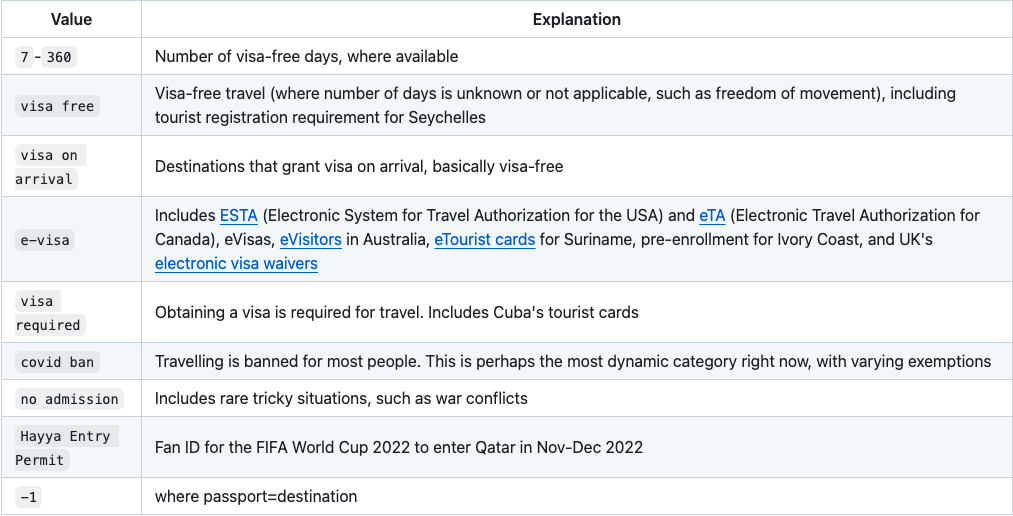

In [41]:
from IPython.display import Image
Image(filename='IMAGES/visa_table.png')

*Covid bans and FIFA World Cup labels are not relevant in our case*

We will simplify the classification schema as follows.

In [46]:
#Remapping function
def remap_requirement(req):
    if req.isdigit(): 
        return 'no visa' #1
    elif req == '-1': #-1 is not a digit for isdigit()
        return 'no visa'#1
    else:
        req_mapping = {
            'visa free': 'no visa', #1
            'visa on arrival': 'no visa', #1
            'e-visa': 'e-visa', #0.5
            'visa required': 'visa', #0.5
            'no admission': 'no entry' #0
        }
        return req_mapping.get(req, req)  #Default to original if no mapping found

In [47]:
visa_data['Req_remap'] = visa_data['Requirement'].apply(remap_requirement)

In [48]:
visa_data['Req_remap'].unique()

array(['e-visa', 'visa', 'no visa', 'no entry'], dtype=object)

In [49]:
visa_data.head()

Passport Destination    Requirement Req_remap
0      AFG         ALB         e-visa    e-visa
1      AFG         DZA  visa required      visa
2      AFG         AND  visa required      visa
3      AFG         AGO  visa required      visa
4      AFG         ATG         e-visa    e-visa

#### Linking the visa information to the routes data

First we will link the visa information with the country names from the UN data table.

In [80]:
visa_country_names = visa_data.copy()

In [81]:
#Passport country name

visa_country_names = visa_country_names.merge(UN_data_filter[['OF Country Name', 'Country Code']], left_on = 'Passport', right_on = 'Country Code', how = 'left')

visa_country_names = visa_country_names.rename(columns={"OF Country Name": "Passport_name"})

visa_country_names = visa_country_names.drop(columns='Country Code')

In [82]:
#Destination country name

visa_country_names = visa_country_names.merge(UN_data_filter[['OF Country Name', 'Country Code']], left_on = 'Destination', right_on = 'Country Code', how = 'left')

visa_country_names = visa_country_names.rename(columns={"OF Country Name": "Destination_name"})

visa_country_names = visa_country_names.drop(columns='Country Code')

In [85]:
#These are the countries that were not present in UN data

visa_country_names[visa_country_names['Passport_name'].isna()]['Passport'].unique()

array(['AND', 'XKX', 'KGZ', 'LIE', 'MCO', 'PSE', 'SMR', 'TWN', 'VAT'],
      dtype=object)

Now through the country names we connect the country ISO codes to the airports data.

In [106]:
airports = airports.merge(visa_country_names[['Passport', 'Passport_name']], left_on = 'Country', right_on = 'Passport_name', how = 'left')

#Dropping duplicates
airports = airports.drop_duplicates(subset=['ID'])

airports = airports.rename(columns={"Passport": "ISO"})

airports = airports.drop(columns='Passport_name')

In [108]:
airports.head()

ID                                         Name          City  \
0     1                               Goroka Airport        Goroka   
199   2                               Madang Airport        Madang   
398   3                 Mount Hagen Kagamuga Airport   Mount Hagen   
597   4                               Nadzab Airport        Nadzab   
796   5  Port Moresby Jacksons International Airport  Port Moresby   

              Country IATA  ICAO  Latitude           Longitude  Altitude  \
0    Papua New Guinea  GKA  AYGA -6.081690       145.391998291      5282   
199  Papua New Guinea  MAG  AYMD -5.207080       145.789001465        20   
398  Papua New Guinea  HGU  AYMH -5.826790  144.29600524902344      5388   
597  Papua New Guinea  LAE  AYNZ -6.569803          146.725977       239   
796  Papua New Guinea  POM  AYPY -9.443380  147.22000122070312       146   

    Timezone DST  Tz database timezone     Type       Source  ISO  
0         10   U  Pacific/Port_Moresby  airport  OurAirports  PNG  
199       10   U  Pacific/Port_Moresby  airport  OurAirports  PNG  
398       10   U  Pacific/Port_Moresby  airport  OurAirports  PNG  
597       10   U  Pacific/Port_Moresby  airport  OurAirports  PNG  
796       10   U  Pacific/Port_Moresby  airport  OurAirports  PNG

Now we are able to connect the ISO codes of the airports to the endpoints in the routes dataset.

In [126]:
#Source country ISO

routes = routes.merge(airports[['IATA', 'ISO']], left_on = 'Source', right_on = 'IATA', how = 'left')

routes = routes.rename(columns={"ISO": "Source_ISO"})

routes = routes.drop(columns='IATA')

In [127]:
#Destination country ISO

routes = routes.merge(airports[['IATA', 'ISO']], left_on = 'Destination', right_on = 'IATA', how = 'left')

routes = routes.rename(columns={"ISO": "Destination_ISO"})

routes = routes.drop(columns='IATA')

In [128]:
routes.head()

Airline Airline ID Source Source ID Destination Destination ID Codeshare  \
0      2B        410    AER      2965         KZN           2990       NaN   
1      2B        410    ASF      2966         KZN           2990       NaN   
2      2B        410    ASF      2966         MRV           2962       NaN   
3      2B        410    CEK      2968         KZN           2990       NaN   
4      2B        410    CEK      2968         OVB           4078       NaN   

   Stops Equipment Source_ISO Destination_ISO  
0      0       CR2        RUS             RUS  
1      0       CR2        RUS             RUS  
2      0       CR2        RUS             RUS  
3      0       CR2        RUS             RUS  
4      0       CR2        RUS             RUS

In [129]:
#Routes with no endpoint ISO

print(f"{routes['Source_ISO'].isna().sum()} routes have no source country value")
print(f"{routes['Destination_ISO'].isna().sum()} routes have no destination country value")

1801 routes have no source country value
1805 routes have no destination country value


Now we can finally add the visa labels to the routes.

In [131]:
#Rename the columns in the visa dataframe for easier merge

visa_country_names = visa_country_names.rename(columns={'Passport': 'Source_ISO', 'Destination': 'Destination_ISO'})

In [136]:
routes = routes.merge(visa_country_names[['Source_ISO', 'Destination_ISO', 'Req_remap']], 
                            on=['Source_ISO', 'Destination_ISO'], 
                            how='left')

routes = routes.rename(columns={"Req_remap": "Visa"})

In [137]:
routes.head()

Airline Airline ID Source Source ID Destination Destination ID Codeshare  \
0      2B        410    AER      2965         KZN           2990       NaN   
1      2B        410    ASF      2966         KZN           2990       NaN   
2      2B        410    ASF      2966         MRV           2962       NaN   
3      2B        410    CEK      2968         KZN           2990       NaN   
4      2B        410    CEK      2968         OVB           4078       NaN   

   Stops Equipment Source_ISO Destination_ISO     Visa  
0      0       CR2        RUS             RUS  no visa  
1      0       CR2        RUS             RUS  no visa  
2      0       CR2        RUS             RUS  no visa  
3      0       CR2        RUS             RUS  no visa  
4      0       CR2        RUS             RUS  no visa

### Country geodata

We will also include geometries to the UN data to be able to plot the results later on.

Data originates from this GitHub repo: https://github.com/datasets/geo-countries

In [141]:
import geopandas as gpd

#Geodataframe
geo_df = gpd.read_file("DATA/countries.geojson")

In [142]:
geo_df.head()

ADMIN ISO_A3 ISO_A2  \
0        Aruba    ABW     AW   
1  Afghanistan    AFG     AF   
2       Angola    AGO     AO   
3     Anguilla    AIA     AI   
4      Albania    ALB     AL   

                                            geometry  
0  MULTIPOLYGON (((-69.99694 12.57758, -69.93639 ...  
1  MULTIPOLYGON (((71.04980 38.40866, 71.05714 38...  
2  MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...  
3  MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ...  
4  MULTIPOLYGON (((19.74777 42.57890, 19.74601 42...

Adding the geometries of UN countries to the UN dataset.

In [148]:
UN_data_geo = UN_data_filter.copy()

In [149]:
UN_data_geo = UN_data_geo.merge(geo_df[['ISO_A3', 'geometry']], left_on = 'Country Code', right_on = 'ISO_A3', how = 'left')

UN_data_geo = UN_data_geo.drop(columns='ISO_A3')

In [150]:
UN_data_geo.head()

Country Name Country Code        2014        2022  \
0                 Aruba          ABW    103594.0    106445.0   
1           Afghanistan          AFG  32716210.0  41128771.0   
2                Angola          AGO  27128337.0  35588987.0   
3               Albania          ALB   2889104.0   2777689.0   
4  United Arab Emirates          ARE   8835951.0   9441129.0   

                       Region          IncomeGroup       OF Country Name  \
0   Latin America & Caribbean          High income                 Aruba   
1                  South Asia           Low income           Afghanistan   
2          Sub-Saharan Africa  Lower middle income                Angola   
3       Europe & Central Asia  Upper middle income               Albania   
4  Middle East & North Africa          High income  United Arab Emirates   

                                            geometry  
0  MULTIPOLYGON (((-69.99694 12.57758, -69.93639 ...  
1  MULTIPOLYGON (((71.04980 38.40866, 71.05714 38...  
2  MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...  
3  MULTIPOLYGON (((19.74777 42.57890, 19.74601 42...  
4  MULTIPOLYGON (((53.86305 24.23469, 53.88860 24...

### Graph creation

**NB!** Needs to be updated since routes have been complimented with visa information.

In [96]:
import networkx as nx

In [97]:
G = nx.DiGraph()

for index, row in airports.iterrows():
    G.add_node(row['ID'], name=row['Name'], city=row['City'], country=row['Country'], iata=row['IATA'], icao=row['ICAO'], lat=row['Latitude'], lon=row['Longitude'])

for index, row in routes.iterrows():
    try:
        #Attempt to convert Source ID and Destination ID to integers
        source_id = int(row['Source ID'])
        dest_id = int(row['Destination ID'])
    except ValueError:
        #If conversion fails, skip this row
        print(f"Skipping invalid route from {row['Source ID']} to {row['Destination ID']}")
        continue

    #Retrieve source and destination node information
    if source_id in G.nodes and dest_id in G.nodes:
        source_node = G.nodes[source_id]
        dest_node = G.nodes[dest_id]

        #Check if both nodes have latitude and longitude information
        if 'lat' in source_node and 'lon' in source_node and 'lat' in dest_node and 'lon' in dest_node:
            
            G.add_edge(source_id, dest_id, 
                       airline=row['Airline ID'],
                       source_lat=source_node['lat'], source_lon=source_node['lon'],
                       dest_lat=dest_node['lat'], dest_lon=dest_node['lon'])
        else:
            print(f"Missing location data for route from {source_id} to {dest_id}")
    else:
        print(f"One or both airports not found for route from {source_id} to {dest_id}")

Skipping invalid route from 4029 to \N
Skipping invalid route from \N to 4029
Skipping invalid route from 2937 to \N
Skipping invalid route from \N to 2937
One or both airports not found for route from 3531 to 7167
One or both airports not found for route from 3531 to 7168
One or both airports not found for route from 3531 to 7164
One or both airports not found for route from 3531 to 7163
One or both airports not found for route from 7167 to 7176
One or both airports not found for route from 7168 to 7173
One or both airports not found for route from 7164 to 7165
One or both airports not found for route from 7173 to 7172
One or both airports not found for route from 7144 to 7145
One or both airports not found for route from 7144 to 3808
One or both airports not found for route from 7145 to 7144
One or both airports not found for route from 7145 to 7147
One or both airports not found for route from 7145 to 3808
One or both airports not found for route from 7147 to 7145
One or both airpor

#### Plotting the graph on a world map

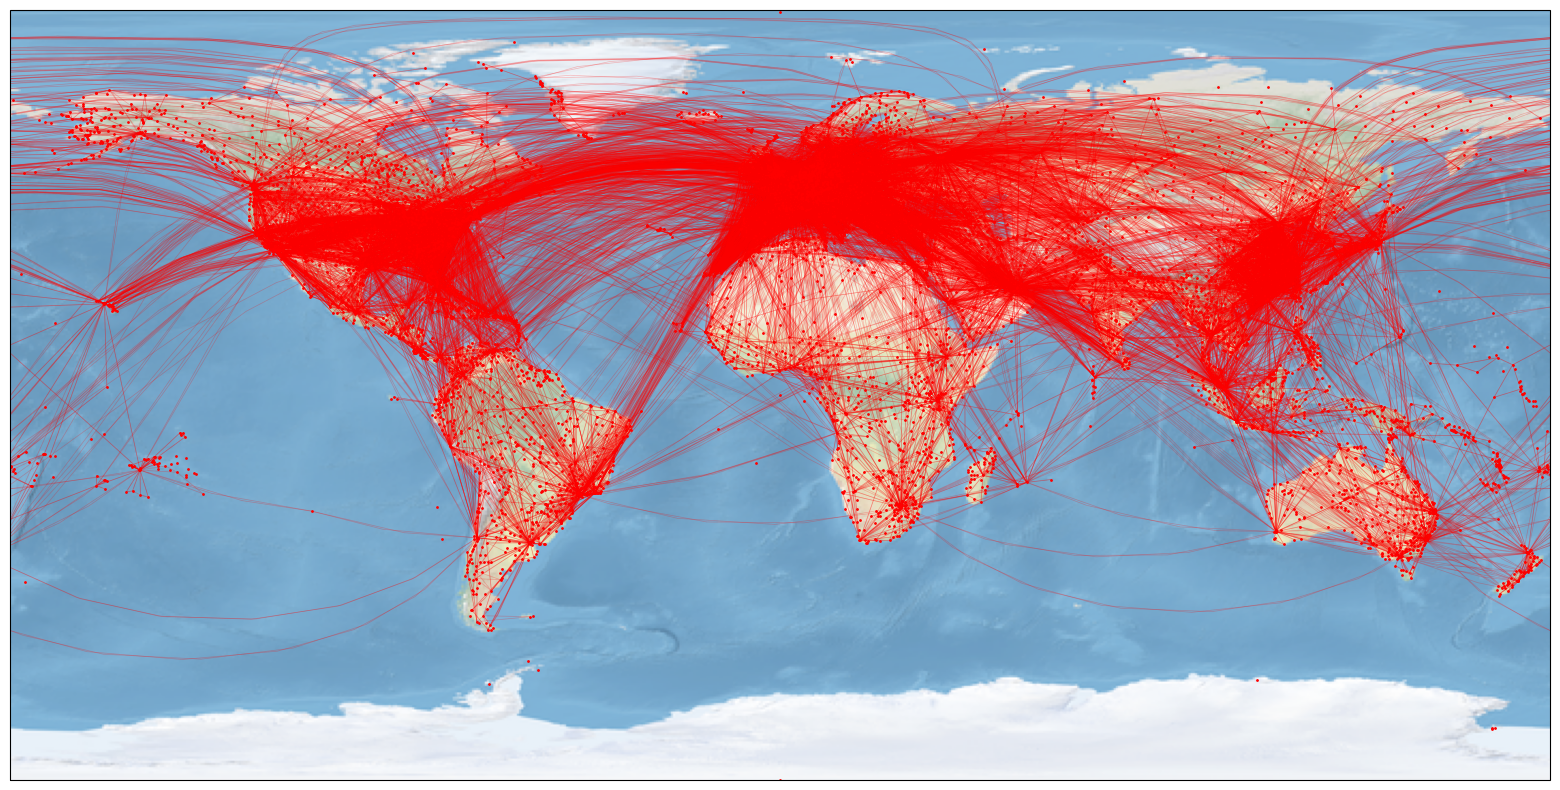

In [98]:
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()
ax.stock_img()  

#Airports
for node, attrs in G.nodes(data=True):
    #Check if both 'lat' and 'lon' attributes exist
    if 'lon' in attrs and 'lat' in attrs:
        ax.plot(attrs['lon'], attrs['lat'], marker='o', color='red', markersize=1, transform=ccrs.Geodetic())


#Routes
for source, dest, attrs in G.edges(data=True):
    source_node = G.nodes[source]
    dest_node = G.nodes[dest]
        
    source_coords = (source_node['lat'], source_node['lon'])
    dest_coords = (dest_node['lat'], dest_node['lon'])
                     
    ax.plot([source_coords[1], dest_coords[1]], [source_coords[0], dest_coords[0]], color='red', linewidth=0.5, alpha=0.25, transform=ccrs.Geodetic())

plt.show()

#### Strongly connected components

In [99]:
strongly_connected_components = list(nx.strongly_connected_components(G))

for i, component in enumerate(strongly_connected_components, start=1):
      print(f"Component {i}: {component}, Length: {len(component)}")

Component 1: {7161}, Length: 1
Component 2: {7162}, Length: 1
Component 3: {7091}, Length: 1
Component 4: {7094}, Length: 1
Component 5: {6372}, Length: 1
Component 6: {7369}, Length: 1
Component 7: {2518}, Length: 1
Component 8: {8240}, Length: 1
Component 9: {8259}, Length: 1
Component 10: {7370}, Length: 1
Component 11: {2697}, Length: 1
Component 12: {4125}, Length: 1
Component 13: {4336}, Length: 1
Component 14: {1040}, Length: 1
Component 15: {11290}, Length: 1
Component 16: {7246}, Length: 1
Component 17: {7135}, Length: 1
Component 18: {7158}, Length: 1
Component 19: {1463}, Length: 1
Component 20: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 8199, 8200, 15, 16, 8209, 18, 21, 24, 8217, 27, 28, 29, 30, 31, 32, 33, 34, 8225, 8227, 37, 36, 8223, 40, 41, 8235, 45, 8237, 8238, 8239, 49, 50, 8242, 8244, 48, 54, 55, 8247, 56, 58, 60, 61, 62, 63, 8256, 65, 8258, 67, 68, 69, 70, 71, 72, 73, 8266, 75, 77, 78, 79, 80, 85, 87, 90, 91, 94, 99, 100, 105, 106, 108, 109, 111, 112, 113, 115, 116, 11

Keeping only the largest strongly connected component

In [100]:
largest_sc_component = max(nx.strongly_connected_components(G), key=len)

G_sc = G.subgraph(largest_sc_component)

In [101]:
print(f'Nodes: {len(G_sc.nodes)}')
print(f'Edges: {len(G_sc.edges)}')

Nodes: 3147
Edges: 36816


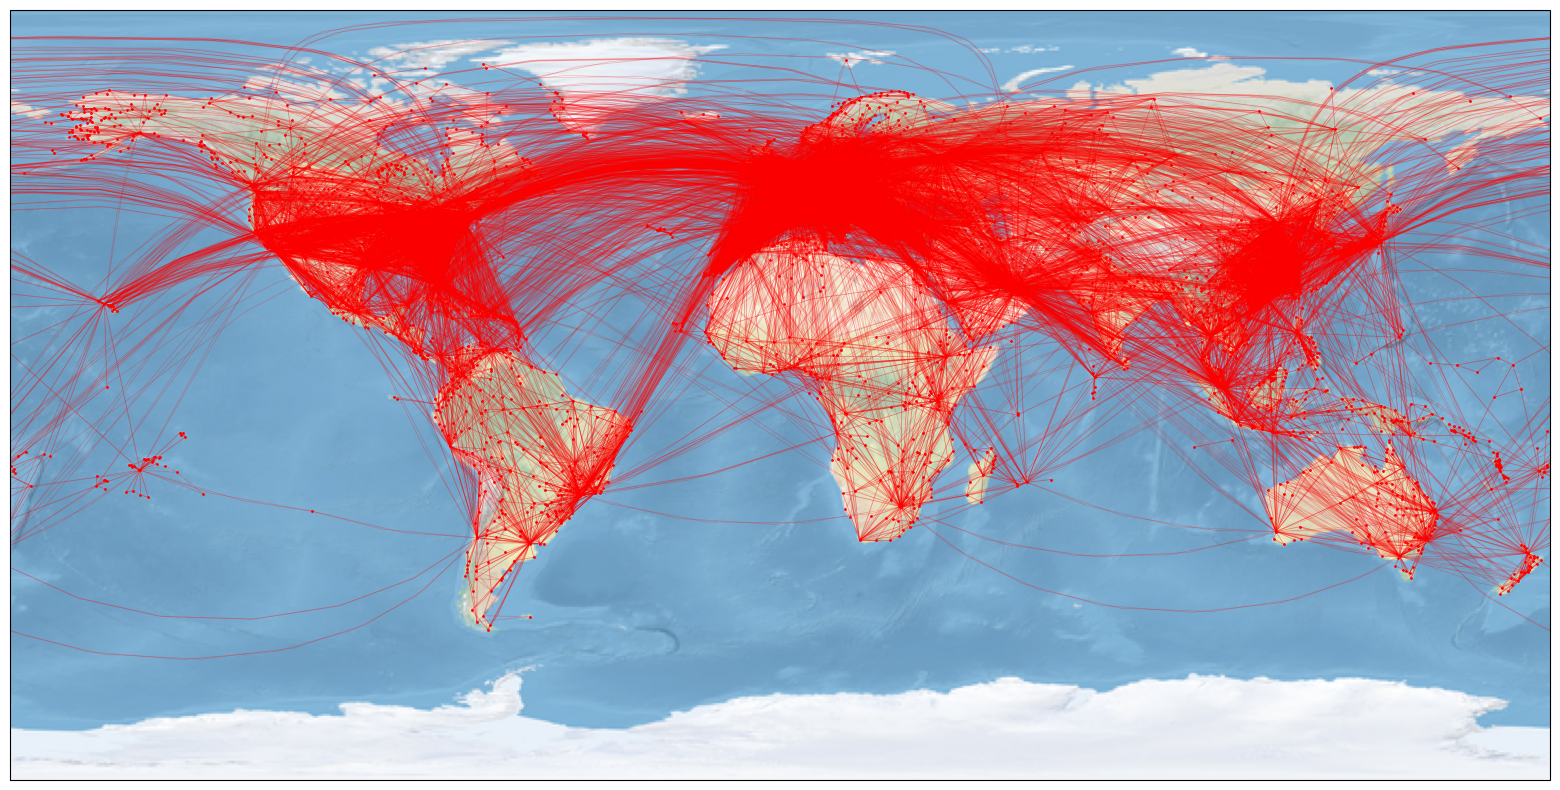

In [102]:
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()
ax.stock_img()  

#Airports
for node, attrs in G_sc.nodes(data=True):
    #Check if both 'lat' and 'lon' attributes exist
    if 'lon' in attrs and 'lat' in attrs:
        ax.plot(attrs['lon'], attrs['lat'], marker='o', color='red', markersize=1, transform=ccrs.Geodetic())


#Routes
for source, dest, attrs in G_sc.edges(data=True):
    source_node = G_sc.nodes[source]
    dest_node = G_sc.nodes[dest]
        
    source_coords = (source_node['lat'], source_node['lon'])
    dest_coords = (dest_node['lat'], dest_node['lon'])
                     
    ax.plot([source_coords[1], dest_coords[1]], [source_coords[0], dest_coords[0]], color='red', linewidth=0.5, alpha=0.25, transform=ccrs.Geodetic())

plt.show()

**Potential research questions:**

What are the routes that are shared between the most airlines?

Which airlines have the most overlapping routes (by total and by proportion)?

Which airports are the most central globally e.g. have high degree centrality?

Which airports are the most important connectors e.g. have high betweenness centrality?

#### Which airports are the most central globally e.g. have high degree centrality?


In [103]:
degree_centrality = nx.degree_centrality(G_sc)

In [104]:
top_dc = pd.DataFrame(degree_centrality.items())
top_dc.columns =['ID', 'degree_centrality']
top_dc = top_dc.sort_values(by=['degree_centrality'], ascending=False)
top_dc = pd.merge(top_dc,
                      airports,
                      on ='ID',
                      how ='inner')
top_dc.head(10)

ID  degree_centrality                                              Name  \
0   340           0.151621                         Frankfurt am Main Airport   
1  1382           0.149078           Charles de Gaulle International Airport   
2   580           0.147171                        Amsterdam Airport Schiphol   
3  1701           0.143357                     Atatürk International Airport   
4  3682           0.137635  Hartsfield Jackson Atlanta International Airport   
5  3830           0.129688              Chicago O'Hare International Airport   
6  3364           0.129688             Beijing Capital International Airport   
7   346           0.120788                                    Munich Airport   
8  4029           0.119199                  Domodedovo International Airport   
9  3670           0.117928           Dallas Fort Worth International Airport   

                City        Country IATA  ICAO   Latitude   Longitude  \
0          Frankfurt        Germany  FRA  EDDF  50.033333    8.570556   
1              Paris         France  CDG  LFPG  49.012798    2.550000   
2          Amsterdam    Netherlands  AMS  EHAM  52.308601    4.763890   
3           Istanbul         Turkey  ISL  LTBA  40.976898   28.814600   
4            Atlanta  United States  ATL  KATL  33.636700  -84.428101   
5            Chicago  United States  ORD  KORD  41.978600  -87.904800   
6            Beijing          China  PEK  ZBAA  40.080101  116.584999   
7             Munich        Germany  MUC  EDDM  48.353802   11.786100   
8             Moscow         Russia  DME  UUDD  55.408798   37.906300   
9  Dallas-Fort Worth  United States  DFW  KDFW  32.896801  -97.038002   

   Altitude Timezone DST Tz database timezone     Type       Source  
0       364        1   E        Europe/Berlin  airport  OurAirports  
1       392        1   E         Europe/Paris  airport  OurAirports  
2       -11        1   E     Europe/Amsterdam  airport  OurAirports  
3       163        3   E      Europe/Istanbul  airport  OurAirports  
4      1026       -5   A     America/New_York  airport  OurAirports  
5       672       -6   A      America/Chicago  airport  OurAirports  
6       116        8   U        Asia/Shanghai  airport  OurAirports  
7      1487        1   E        Europe/Berlin  airport  OurAirports  
8       588        3   N        Europe/Moscow  airport  OurAirports  
9       607       -6   A      America/Chicago  airport  OurAirports

In [105]:
top10_dc = top_dc.head(10)

top_10_airport_ids = set(top10_dc['ID'])

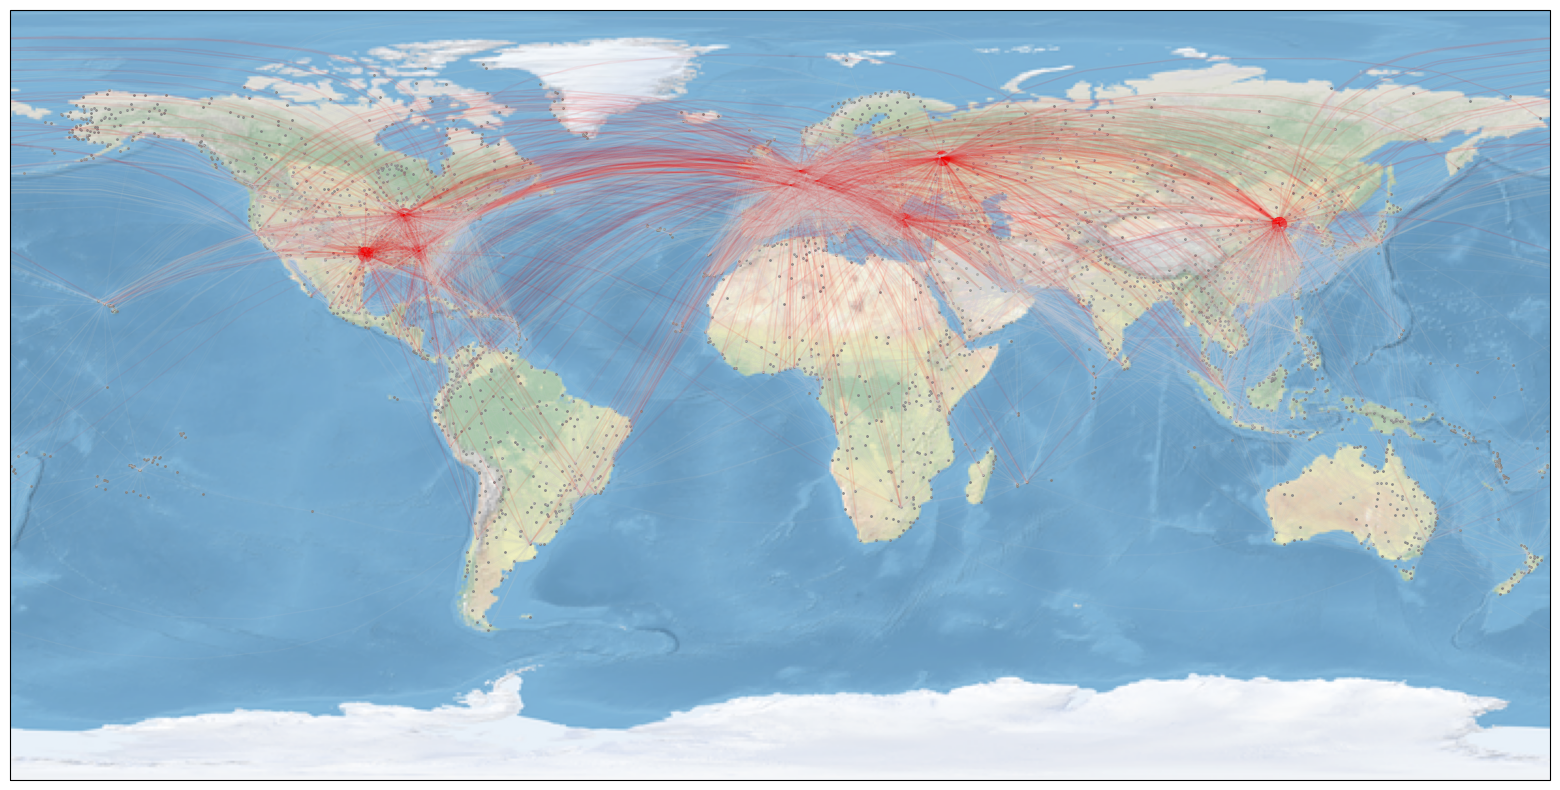

In [106]:
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()
ax.stock_img()  

#Airports
for node, attrs in G_sc.nodes(data=True):
    #Check if both 'lat' and 'lon' attributes exist
    if 'lon' in attrs and 'lat' in attrs:
        color = 'red' if node in top_10_airport_ids else 'grey'  #Highlight top 10 in red
        ax.plot(attrs['lon'], attrs['lat'], marker='o', color=color, markersize=10 if node in top_10_airport_ids else 1, transform=ccrs.Geodetic())


#Routes
for source, dest, attrs in G_sc.edges(data=True):
    source_node = G_sc.nodes[source]
    dest_node = G_sc.nodes[dest]
        
    source_coords = (source_node['lat'], source_node['lon'])
    dest_coords = (dest_node['lat'], dest_node['lon'])

    color = 'red' if source in top_10_airport_ids or dest in top_10_airport_ids else 'lightgrey'
    ax.plot([source_coords[1], dest_coords[1]], [source_coords[0], dest_coords[0]], color=color, linewidth=30 if node in top_10_airport_ids else 1, alpha=1 if node in top_10_airport_ids else 0.05, transform=ccrs.Geodetic())

plt.show()

In [107]:
routes_connected_to_top10 = 0

for source, dest, attrs in G_sc.edges(data=True):

    if source in top_10_airport_ids or dest in top_10_airport_ids:
        routes_connected_to_top10 += 1

print(f'{routes_connected_to_top10} operated routes out of {len(G_sc.edges)} are either in our outlinks from the 10 largest airports in terms of degree centrality.')
print(f'This is {round((routes_connected_to_top10/len(G_sc.edges))*100,2)}% out of all routes.')

4169 operated routes out of 36816 are either in our outlinks from the 10 largest airports in terms of degree centrality.
This is 11.32% out of all routes.


#### Which airports are the most important connectors e.g. have high betweenness centrality?

In [108]:
betweenness_centrality = nx.betweenness_centrality(G_sc)

In [109]:
top_bc = pd.DataFrame(betweenness_centrality.items())
top_bc.columns =['ID', 'betweenness_centrality']
top_bc = top_bc.sort_values(by=['betweenness_centrality'], ascending=False)
top_bc = pd.merge(top_bc,
                      airports,
                      on ='ID',
                      how ='inner')
top_bc.head(10)

ID  betweenness_centrality                                         Name  \
0  1382                0.064090      Charles de Gaulle International Airport   
1  3484                0.062142            Los Angeles International Airport   
2  2188                0.060087                  Dubai International Airport   
3   340                0.054225                    Frankfurt am Main Airport   
4  3774                0.052764  Ted Stevens Anchorage International Airport   
5  3364                0.051084        Beijing Capital International Airport   
6  3830                0.046272         Chicago O'Hare International Airport   
7   193                0.045887      Lester B. Pearson International Airport   
8   580                0.045717                   Amsterdam Airport Schiphol   
9  1701                0.043056                Atatürk International Airport   

          City               Country IATA  ICAO   Latitude   Longitude  \
0        Paris                France  CDG  LFPG  49.012798    2.550000   
1  Los Angeles         United States  LAX  KLAX  33.942501 -118.407997   
2        Dubai  United Arab Emirates  DXB  OMDB  25.252800   55.364399   
3    Frankfurt               Germany  FRA  EDDF  50.033333    8.570556   
4    Anchorage         United States  ANC  PANC  61.174400 -149.996002   
5      Beijing                 China  PEK  ZBAA  40.080101  116.584999   
6      Chicago         United States  ORD  KORD  41.978600  -87.904800   
7      Toronto                Canada  YYZ  CYYZ  43.677200  -79.630600   
8    Amsterdam           Netherlands  AMS  EHAM  52.308601    4.763890   
9     Istanbul                Turkey  ISL  LTBA  40.976898   28.814600   

   Altitude Timezone DST Tz database timezone     Type       Source  
0       392        1   E         Europe/Paris  airport  OurAirports  
1       125       -8   A  America/Los_Angeles  airport  OurAirports  
2        62        4   U           Asia/Dubai  airport  OurAirports  
3       364        1   E        Europe/Berlin  airport  OurAirports  
4       152       -9   A    America/Anchorage  airport  OurAirports  
5       116        8   U        Asia/Shanghai  airport  OurAirports  
6       672       -6   A      America/Chicago  airport  OurAirports  
7       569       -5   A      America/Toronto  airport  OurAirports  
8       -11        1   E     Europe/Amsterdam  airport  OurAirports  
9       163        3   E      Europe/Istanbul  airport  OurAirports

In [110]:
top10_bc = top_bc.head(10)

top_10_airport_ids = set(top10_bc['ID'])

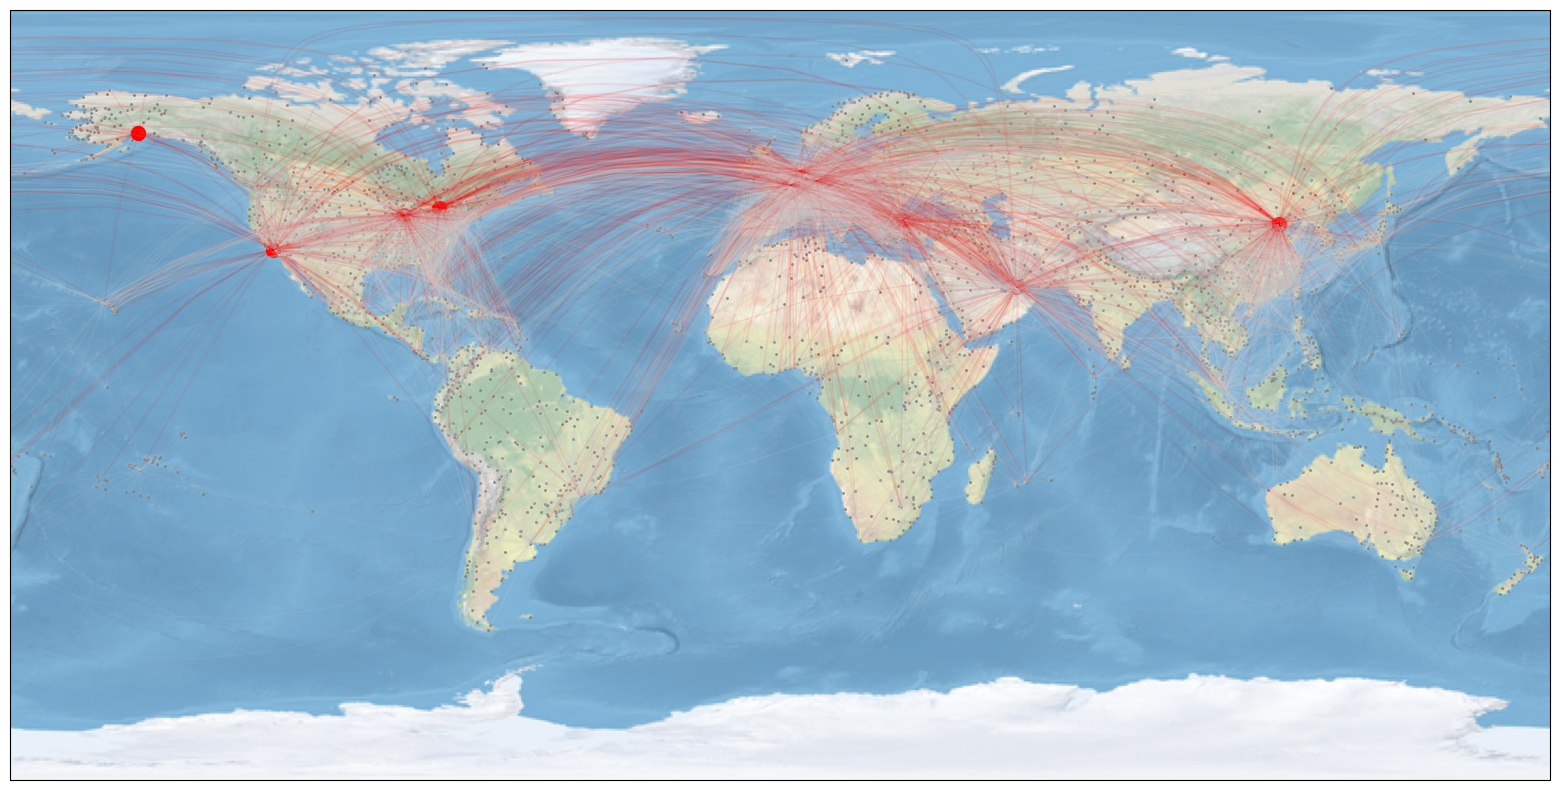

In [111]:
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()
ax.stock_img()  

#Airports
for node, attrs in G_sc.nodes(data=True):
    #Check if both 'lat' and 'lon' attributes exist
    if 'lon' in attrs and 'lat' in attrs:
        color = 'red' if node in top_10_airport_ids else 'grey'  #Highlight top 10 in red
        ax.plot(attrs['lon'], attrs['lat'], marker='o', color=color, markersize=10 if node in top_10_airport_ids else 1, transform=ccrs.Geodetic())


#Routes
for source, dest, attrs in G_sc.edges(data=True):
    source_node = G_sc.nodes[source]
    dest_node = G_sc.nodes[dest]
        
    source_coords = (source_node['lat'], source_node['lon'])
    dest_coords = (dest_node['lat'], dest_node['lon'])

    color = 'red' if source in top_10_airport_ids or dest in top_10_airport_ids else 'lightgrey'
    ax.plot([source_coords[1], dest_coords[1]], [source_coords[0], dest_coords[0]], color=color, linewidth=100 if node in top_10_airport_ids else 1, alpha=1 if node in top_10_airport_ids else 0.05, transform=ccrs.Geodetic())

plt.show()

In [112]:
routes_connected_to_top10 = 0

for source, dest, attrs in G_sc.edges(data=True):

    if source in top_10_airport_ids or dest in top_10_airport_ids:
        routes_connected_to_top10 += 1

print(f'{routes_connected_to_top10} operated routes out of {len(G_sc.edges)} are either in our outlinks from the 10 largest airports in terms of betweenness centrality.')
print(f'This is {round((routes_connected_to_top10/len(G_sc.edges))*100,2)}% out of all routes.')

3622 operated routes out of 36816 are either in our outlinks from the 10 largest airports in terms of betweenness centrality.
This is 9.84% out of all routes.
